In [14]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [15]:
products =pd.DataFrame(pd.read_csv('products.csv'))
cops=pd.DataFrame(pd.read_csv('copurchase.csv'))

In [ ]:
products.head()

In [ ]:
cops.head()

In [3]:
g = nx.from_pandas_edgelist(cops, 'Source', 'Target')

In [ ]:
products.group.unique()

In [16]:
# create dfs for categories
books=products[(products['group']=='Book')]
books_cops=cops[cops.Source.isin(books.id) & cops.Target.isin(books.id)]
g_books = nx.from_pandas_edgelist(books_cops, 'Source', 'Target')

music=products[(products['group']=='Music')]
music_cops=cops[cops.Source.isin(music.id) & cops.Target.isin(music.id)]
g_music = nx.from_pandas_edgelist(music_cops, 'Source', 'Target')

dvds=products[(products['group']=='DVD')]
dvds_cops=cops[cops.Source.isin(dvds.id) & cops.Target.isin(dvds.id)]
g_dvds = nx.from_pandas_edgelist(dvds_cops, 'Source', 'Target')

videos=products[(products['group']=='Video')]
videos_cops=cops[cops.Source.isin(videos.id) & cops.Target.isin(videos.id)]
g_videos = nx.from_pandas_edgelist(videos_cops, 'Source', 'Target')

print("num books:", len(books.index))
print("num music:", len(music.index))
print("num dvds:", len(dvds.index))
print("num videos:", len(videos.index))

num books: 188013
num music: 48993
num dvds: 9554
num videos: 12597


# Look at centrality measures

## Degree

In [20]:
def get_degree(g):
    nodes = [node for (node, val) in g.degree()]
    degrees = [val for (node, val) in g.degree()]
    d = np.array(degrees)

    print("min degree:", min(d), ",node id: ", nodes[np.argmin(d)]) # prob more than 1
    print("max degree:", max(d), ",node id: ", nodes[np.argmax(d)])
    print("mean degree:", np.mean(d))
    print("median degree:", np.median(d))
    
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.hist(d, weights=np.ones(len(d)) / len(d))

In [26]:
max_centrality_prod = products[products['id'] == nodes[np.argmax(d)]]
max_centrality_prod

,id,title,group,salesrank,review_cnt,downloads,rating
14805,14949,Fodor's Australia 2000,Book,793062.0,1,1,5.0


min degree: 1 ,node id:  289
max degree: 420 ,node id:  14949
mean degree: 6.865720499027126
median degree: 6.0


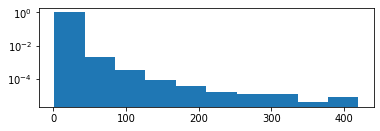

In [29]:
get_degree(g)

min degree: 1 ,node id:  300
max degree: 309 ,node id:  14949
mean degree: 4.990120711050944
median degree: 4.0


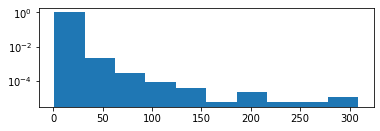

In [30]:
get_degree(g_books)

min degree: 1 ,node id:  208
max degree: 62 ,node id:  10519
mean degree: 1.897109793474836
median degree: 2.0


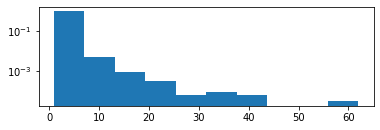

In [31]:
get_degree(g_music)

min degree: 1 ,node id:  44
max degree: 8 ,node id:  12615
mean degree: 1.376510067114094
median degree: 1.0


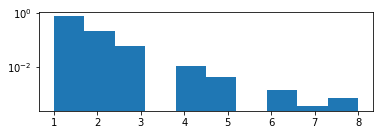

In [32]:
get_degree(g_dvds)

min degree: 1 ,node id:  410
max degree: 10 ,node id:  40546
mean degree: 1.2547887693518762
median degree: 1.0


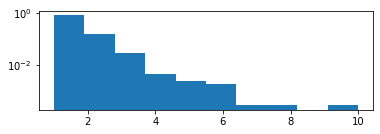

In [33]:
get_degree(g_videos)

## Betweeness

In [37]:
def get_betweenness(g):
    betweenness = nx.betweenness_centrality(g)
#     degrees = [val for (node, val) in g.degree()]
#     d = np.array(degrees)
    b = list(betweenness.values())

    i = max(betweenness, key=betweenness.get)
    print(i)
#     print(betweenness.values())
    print(max(list(betweenness.values())))

    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    ax.hist(b)

12615
1.4428287017404797e-05


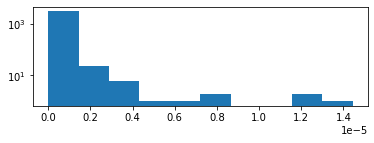

In [38]:
get_betweenness(g_dvds)

10745
1.8604920381276835e-05


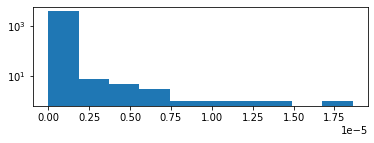

In [39]:
get_betweenness(g_videos)

In [1]:
music_pop=products[(products['group']=='Music') & (products['salesrank'] <= 130000)]
music_pop_cops=cops[cops.Source.isin(music_pop.id) & cops.Target.isin(music_pop.id)]
g_music_pop = nx.from_pandas_edgelist(music_pop_cops, 'Source', 'Target')

get_betweenness(g_music_pop)

# i = max(nx.betweenness_centrality(g_music), key=nx.betweenness_centrality(g_music).get)
# print(i)
# print(max(nx.betweenness_centrality(g_music)))

NameError: name 'products' is not defined

In [2]:
books_pop=products[(products['group']=='Book') & (products['salesrank'] <= 130000)]
books_pop_cops=cops[cops.Source.isin(books_pop.id) & cops.Target.isin(books_pop.id)]
g_books_pop = nx.from_pandas_edgelist(books_pop_cops, 'Source', 'Target')

get_betweenness(g_books_pop)

# g_books = nx.from_pandas_edgelist(books_cops, 'Source', 'Target')
# i = max(nx.betweenness_centrality(g_books), key=nx.betweenness_centrality(g_books).get)
# print(i)
# print(max(nx.betweenness_centrality(g_books)))

NameError: name 'products' is not defined

In [ ]:
# look at gatekeepers

In [ ]:
# look at cycles

In [7]:
# visualization of graph
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(g_dvds)
net.show("example.html")

In [9]:
net = Network(notebook = True)
net.from_nx(g_videos)
net.show("example.html")

In [ ]:
net = Network(notebook = True)
net.from_nx(g)
net.show("example.html")

In [ ]:
# maybe do hubs/authorities? page rank? 